# Importing Data 

In [1]:
#Importing libraries
import pandas as pd 
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from scipy import stats 
%matplotlib inline
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_test.info() 
#Noticed that it is missing SalePrice which we will predict 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

# Combining Datasets and Analyzing 

In [8]:
datasets = df_train, df_test 
df = pd.concat(datasets)
pd.options.display.max_columns = None
#Displays all the Column 

In [9]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

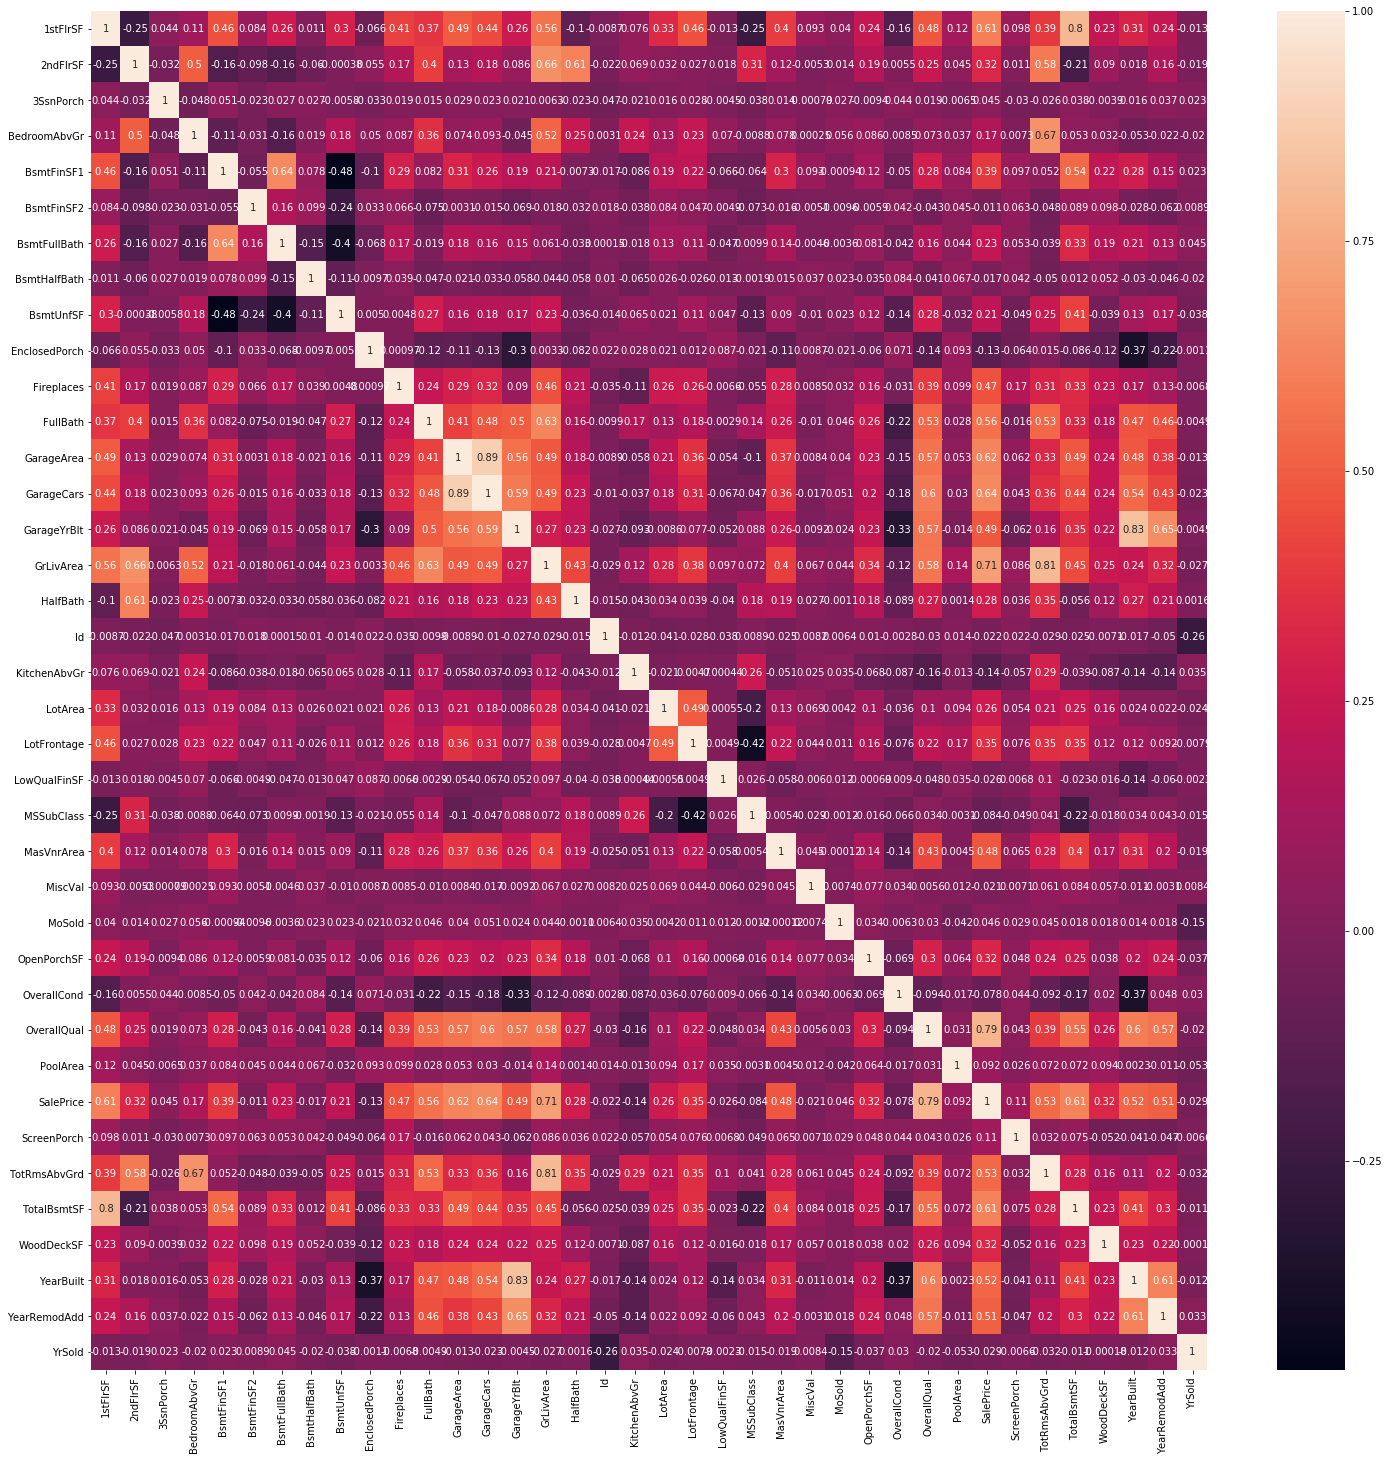

In [11]:
fig, ax = plt.subplots(figsize = (25,25))
sns.heatmap(df.corr(), annot=True, ax=ax)

1stFlrSF, 2ndFlrSF, BsmtFinSF1, Fireplaces, FullBath, GarageArea, GarageCars, GarageBlt, GrLivArea, HalfBath, LotArea, LotFrontage, MasVnrArea, MoSold, OverallQua, TotRmAbvGrd, TotalBsmSF, WoodDeckSF, YearBuilt, YearRemodAdd have a correlation with Sales Price

In [12]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} missing values'.format(column, df[column].isnull().sum()))

Alley has 2721 missing values
BsmtCond has 82 missing values
BsmtExposure has 82 missing values
BsmtFinSF1 has 1 missing values
BsmtFinSF2 has 1 missing values
BsmtFinType1 has 79 missing values
BsmtFinType2 has 80 missing values
BsmtFullBath has 2 missing values
BsmtHalfBath has 2 missing values
BsmtQual has 81 missing values
BsmtUnfSF has 1 missing values
Electrical has 1 missing values
Exterior1st has 1 missing values
Exterior2nd has 1 missing values
Fence has 2348 missing values
FireplaceQu has 1420 missing values
Functional has 2 missing values
GarageArea has 1 missing values
GarageCars has 1 missing values
GarageCond has 159 missing values
GarageFinish has 159 missing values
GarageQual has 159 missing values
GarageType has 157 missing values
GarageYrBlt has 159 missing values
KitchenQual has 1 missing values
LotFrontage has 486 missing values
MSZoning has 4 missing values
MasVnrArea has 23 missing values
MasVnrType has 24 missing values
MiscFeature has 2814 missing values
PoolQC 

In [13]:
df.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2896.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,0.597122,1.568003,472.874572,1.766621,1978.113406,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305795,4.694416,57.137718,102.201312,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,0.646129,0.552969,215.394815,0.761624,25.574285,506.051045,0.502872,842.787043,0.214462,7886.996359,23.344905,46.396825,42.517628,179.334253,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,59.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,80.000000,0.000000,70.000000,164.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


# Looking at Data

## Alley 

In [14]:
df['Alley'].isnull().sum()

2721

In [15]:
df['Alley'].fillna('NA', inplace=True)

In [16]:
df.groupby('Alley')['SalePrice'].median()
#Alleys with Pavement have a higher median house price 

Alley
Grvl    119500.0
NA      165000.0
Pave    172500.0
Name: SalePrice, dtype: float64

In [17]:
df['Alley'].value_counts()

NA      2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

## Basement Condition

In [18]:
df['BsmtCond'].value_counts()
#Two values that do not appear: Excellend and NA

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [19]:
df.loc[df['BsmtCond'].isnull()].head(10)
#Noticed most do not have basements 

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
17,1296,0,0,NA,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,NaN,0,Slab,2,Typ,516.0,2.0,TA,Unf,TA,CarPort,1967.0,1296,0,GasA,TA,1Story,18,2,TA,Lvl,Gtl,10791,Inside,72.0,Reg,0,90,RL,0.0,None,Shed,500,10,Sawyer,0,5,4,Y,0,NaN,CompShg,Gable,Normal,90000.0,WD,0,Pave,6,0.0,AllPub,0,1967,1967,2006
39,1152,0,0,NA,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseP,0,TA,TA,AsbShng,Plywood,NaN,NaN,0,PConc,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1152,0,GasA,TA,1Story,40,2,Fa,Lvl,Gtl,6040,Inside,65.0,Reg,0,90,RL,0.0,None,NaN,0,6,Edwards,0,5,4,N,0,NaN,CompShg,Gable,AdjLand,82000.0,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008
90,1040,0,0,NA,2,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseA,0,TA,TA,BrkFace,Wd Sdng,NaN,NaN,0,Slab,1,Typ,420.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,91,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,7,NAmes,29,5,4,Y,0,NaN,CompShg,Gable,Normal,109900.0,WD,0,Pave,4,0.0,AllPub,0,1950,1950,2006
102,1535,0,0,NA,4,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,Fa,TA,HdBoard,HdBoard,NaN,NaN,0,Slab,2,Typ,410.0,2.0,TA,Unf,TA,Attchd,1979.0,1535,0,GasA,TA,1Story,103,2,TA,Bnk,Gtl,7018,Inside,64.0,Reg,0,90,RL,0.0,None,NaN,0,6,SawyerW,0,5,5,Y,0,NaN,CompShg,Gable,Alloca,118964.0,WD,0,Pave,8,0.0,AllPub,0,1979,1979,2009
156,1040,0,0,NA,2,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseF,0,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,625.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,157,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,6,NAmes,0,7,5,Y,0,NaN,CompShg,Hip,Normal,109500.0,WD,0,Pave,5,0.0,AllPub,0,1950,1950,2006
182,1340,0,180,NA,3,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Artery,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,MnPrv,Gd,1,PConc,1,Typ,252.0,1.0,TA,RFn,TA,Attchd,1957.0,1340,0,GasA,Ex,1Story,183,1,TA,Lvl,Gtl,9060,Inside,60.0,Reg,0,20,RL,98.0,BrkFace,NaN,0,6,Edwards,0,6,5,Y,0,NaN,CompShg,Hip,Normal,120000.0,WD,0,Pave,7,0.0,AllPub,116,1957,2006,2007
259,882,0,0,NA,2,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseA,0,TA,TA,BrkFace,BrkFace,NaN,NaN,0,PConc,1,Typ,308.0,1.0,TA,Unf,TA,Detchd,1956.0,882,0,GasA,Gd,1Story,260,1,TA,Lvl,Gtl,12702,Inside,70.0,Reg,0,20,RM,0.0,None,NaN,0,12,OldTown,45,5,5,Y,0,NaN,CompShg,Gable,Normal,97000.0,WD,0,Pave,4,0.0,AllPub,0,1956,1956,2008
342,1040,0,0,NA,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseA,0,TA,TA,Stucco,Stucco,NaN,NaN,0,Slab,2,Typ,400.0,2.0,TA,Unf,TA,Detchd,1949.0,1040,0,Wall,Fa,1Story,343,2,TA,Lvl,Gtl,8544,Inside,NaN,Reg,0,90,RL,340.0,BrkFace,NaN,0,5,NAmes,0,4,3,Y,0,NaN,CompShg,Gable,Normal,87500.0,WD,0,Pave,6,0.0,AllPub,0,1949,1950,2006
362,495,1427,0,NA,4,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,177,TA,Gd,HdBoard,HdBoard,NaN,Ex,1,Slab,3,Typ,672.0,2.0,TA,RFn,TA,BuiltIn,2003.0,1922,0,GasA,Ex,SFoyer,363,1,Gd,Lvl,Gtl,7301,Corner,64.0,Reg,0,85,RL,500.0,BrkFace,NaN,0,7,Edwards,0,5,7,Y,0,NaN,CompShg,Gable,Normal,198500.0,ConLD,0,Pave,7,0.0,AllPub,0,2003,2003,2009
371,1120,468,0,NA,4,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Feedr,Norm,SBrkr,0,TA,TA

In [20]:
df['BsmtCond'].fillna('NA', inplace=True)

## Basement Exposure

In [21]:
df['BsmtExposure'].value_counts()
#Missing No Basement Value 

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [22]:
df.loc[df['BsmtExposure'].isnull()].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
17,1296,0,0,NA,2,Duplex,NA,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,NaN,0,Slab,2,Typ,516.0,2.0,TA,Unf,TA,CarPort,1967.0,1296,0,GasA,TA,1Story,18,2,TA,Lvl,Gtl,10791,Inside,72.0,Reg,0,90,RL,0.0,None,Shed,500,10,Sawyer,0,5,4,Y,0,NaN,CompShg,Gable,Normal,90000.0,WD,0,Pave,6,0.0,AllPub,0,1967,1967,2006
39,1152,0,0,NA,2,Duplex,NA,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseP,0,TA,TA,AsbShng,Plywood,NaN,NaN,0,PConc,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1152,0,GasA,TA,1Story,40,2,Fa,Lvl,Gtl,6040,Inside,65.0,Reg,0,90,RL,0.0,None,NaN,0,6,Edwards,0,5,4,N,0,NaN,CompShg,Gable,AdjLand,82000.0,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008
90,1040,0,0,NA,2,1Fam,NA,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseA,0,TA,TA,BrkFace,Wd Sdng,NaN,NaN,0,Slab,1,Typ,420.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,91,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,7,NAmes,29,5,4,Y,0,NaN,CompShg,Gable,Normal,109900.0,WD,0,Pave,4,0.0,AllPub,0,1950,1950,2006
102,1535,0,0,NA,4,Duplex,NA,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,Fa,TA,HdBoard,HdBoard,NaN,NaN,0,Slab,2,Typ,410.0,2.0,TA,Unf,TA,Attchd,1979.0,1535,0,GasA,TA,1Story,103,2,TA,Bnk,Gtl,7018,Inside,64.0,Reg,0,90,RL,0.0,None,NaN,0,6,SawyerW,0,5,5,Y,0,NaN,CompShg,Gable,Alloca,118964.0,WD,0,Pave,8,0.0,AllPub,0,1979,1979,2009
156,1040,0,0,NA,2,1Fam,NA,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseF,0,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,625.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,157,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,6,NAmes,0,7,5,Y,0,NaN,CompShg,Hip,Normal,109500.0,WD,0,Pave,5,0.0,AllPub,0,1950,1950,2006


In [23]:
df['BsmtExposure'].fillna('NA', inplace=True)

## Basement Quality

In [25]:
df['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [26]:
df['BsmtQual'].fillna('NA', inplace=True)

## Basement Type 1 & Type 2 Finished Square Feet 

In [27]:
df.loc[df['BsmtFinSF1'].isnull()]
#Only 1 missing values for BsmtFinSF1, there are multiple missing values so we will drop it

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
660,896,0,0,NA,2,1Fam,NA,NA,NaN,NaN,NaN,NaN,NaN,NaN,NA,NaN,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,NaN,0,PConc,1,Typ,280.0,1.0,TA,Unf,TA,Detchd,1946.0,896,0,GasA,TA,1Story,2121,1,TA,Lvl,Gtl,5940,FR3,99.0,IR1,0,20,RM,0.0,None,NaN,0,4,BrkSide,0,7,4,Y,0,NaN,CompShg,Gable,Abnorml,NaN,ConLD,0,Pave,4,NaN,AllPub,0,1946,1950,2008


In [28]:
df = df.dropna(subset = ['BsmtFinSF1'])
#Delete Row 

## Basement Rating in Type 1 

In [29]:
df['BsmtFinType1'].value_counts()
#Noticed there is no NA value

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

In [30]:
df.loc[df['BsmtFinType1'].isnull()].head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
17,1296,0,0,NA,2,Duplex,NA,NA,0.0,0.0,NaN,NaN,0.0,0.0,NA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,NaN,0,Slab,2,Typ,516.0,2.0,TA,Unf,TA,CarPort,1967.0,1296,0,GasA,TA,1Story,18,2,TA,Lvl,Gtl,10791,Inside,72.0,Reg,0,90,RL,0.0,None,Shed,500,10,Sawyer,0,5,4,Y,0,NaN,CompShg,Gable,Normal,90000.0,WD,0,Pave,6,0.0,AllPub,0,1967,1967,2006
39,1152,0,0,NA,2,Duplex,NA,NA,0.0,0.0,NaN,NaN,0.0,0.0,NA,0.0,N,Norm,Norm,FuseP,0,TA,TA,AsbShng,Plywood,NaN,NaN,0,PConc,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1152,0,GasA,TA,1Story,40,2,Fa,Lvl,Gtl,6040,Inside,65.0,Reg,0,90,RL,0.0,None,NaN,0,6,Edwards,0,5,4,N,0,NaN,CompShg,Gable,AdjLand,82000.0,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008
90,1040,0,0,NA,2,1Fam,NA,NA,0.0,0.0,NaN,NaN,0.0,0.0,NA,0.0,Y,Norm,Norm,FuseA,0,TA,TA,BrkFace,Wd Sdng,NaN,NaN,0,Slab,1,Typ,420.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,91,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,7,NAmes,29,5,4,Y,0,NaN,CompShg,Gable,Normal,109900.0,WD,0,Pave,4,0.0,AllPub,0,1950,1950,2006
102,1535,0,0,NA,4,Duplex,NA,NA,0.0,0.0,NaN,NaN,0.0,0.0,NA,0.0,Y,Norm,Norm,SBrkr,0,Fa,TA,HdBoard,HdBoard,NaN,NaN,0,Slab,2,Typ,410.0,2.0,TA,Unf,TA,Attchd,1979.0,1535,0,GasA,TA,1Story,103,2,TA,Bnk,Gtl,7018,Inside,64.0,Reg,0,90,RL,0.0,None,NaN,0,6,SawyerW,0,5,5,Y,0,NaN,CompShg,Gable,Alloca,118964.0,WD,0,Pave,8,0.0,AllPub,0,1979,1979,2009
156,1040,0,0,NA,2,1Fam,NA,NA,0.0,0.0,NaN,NaN,0.0,0.0,NA,0.0,Y,Norm,Norm,FuseF,0,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,625.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,157,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,6,NAmes,0,7,5,Y,0,NaN,CompShg,Hip,Normal,109500.0,WD,0,Pave,5,0.0,AllPub,0,1950,1950,2006
182,1340,0,180,NA,3,1Fam,NA,NA,0.0,0.0,NaN,NaN,0.0,0.0,NA,0.0,Y,Artery,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,MnPrv,Gd,1,PConc,1,Typ,252.0,1.0,TA,RFn,TA,Attchd,1957.0,1340,0,GasA,Ex,1Story,183,1,TA,Lvl,Gtl,9060,Inside,60.0,Reg,0,20,RL,98.0,BrkFace,NaN,0,6,Edwards,0,6,5,Y,0,NaN,CompShg,Hip,Normal,120000.0,WD,0,Pave,7,0.0,AllPub,116,1957,2006,2007
259,882,0,0,NA,2,1Fam,NA,NA,0.0,0.0,NaN,NaN,0.0,0.0,NA,0.0,Y,Norm,Norm,FuseA,0,TA,TA,BrkFace,BrkFace,NaN,NaN,0,PConc,1,Typ,308.0,1.0,TA,Unf,TA,Detchd,1956.0,882,0,GasA,Gd,1Story,260,1,TA,Lvl,Gtl,12702,Inside,70.0,Reg,0,20,RM,0.0,None,NaN,0,12,OldTown,45,5,5,Y,0,NaN,CompShg,Gable,Normal,97000.0,WD,0,Pave,4,0.0,AllPub,0,1956,1956,2008
342,1040,0,0,NA,2,Duplex,NA,NA,0.0,0.0,NaN,NaN,0.0,0.0,NA,0.0,N,Norm,Norm,FuseA,0,TA,TA,Stucco,Stucco,NaN,NaN,0,Slab,2,Typ,400.0,2.0,TA,Unf,TA,Detchd,1949.0,1040,0,Wall,Fa,1Story,343,2,TA,Lvl,Gtl,8544,Inside,NaN,Reg,0,90,RL,340.0,BrkFace,NaN,0,5,NAmes,0,4,3,Y,0,NaN,CompShg,Gable,Normal,87500.0,WD,0,Pave,6,0.0,AllPub,0,1949,1950,2006
362,495,1427,0,NA,4,1Fam,NA,NA,0.0,0.0,NaN,NaN,0.0,0.0,NA,0.0,Y,Norm,Norm,SBrkr,177,TA,Gd,HdBoard,HdBoard,NaN,Ex,1,Slab,3,Typ,672.0,2.0,TA,RFn,TA,BuiltIn,2003.0,1922,0,GasA,Ex,SFoyer,363,1,Gd,Lvl,Gtl,7301,Corner,64.0,Reg,0,85,RL,500.0,BrkFace,NaN,0,7,Edwards,0,5,7,Y,0,NaN,CompShg,Gable,Normal,198500.0,ConLD,0,Pave,7,0.0,AllPub,0,2003,2003,2009
371,1120,468,0,NA,4,1Fam,NA,NA,0.0,0.0,NaN,NaN,0.0,0.0,NA,0.0,Y,Feedr,Norm,SBrkr,0,TA,TA,WdShing,Plywood,NaN,Gd,1,CBlo

In [31]:
df['BsmtFinType1'].fillna('NA', inplace=True)
#Fill in NA values for Missing Values 

## Basement Rating in Other Types 

In [32]:
df['BsmtFinType2'].value_counts()
#There is no NA value 

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [33]:
df['BsmtFinType2'].fillna('NA', inplace=True)

## Number of Basement Full Bathrooms 

In [34]:
df.loc[df['BsmtFullBath'].isnull()]
#Noticed that is there is no basement so we can fill in 0 

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
728,3820,0,0,NA,5,1Fam,NA,NA,0.0,0.0,NA,NA,NaN,NaN,NA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,Slab,3,Typ,624.0,2.0,TA,Unf,TA,Attchd,1959.0,3820,1,GasA,TA,1Story,2189,1,Ex,Lvl,Gtl,47007,Inside,123.0,IR1,0,20,RL,0.0,None,NaN,0,7,Edwards,372,7,5,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,11,0.0,AllPub,0,1959,1996,2008


In [35]:
df['BsmtFullBath'].fillna(0 , inplace=True)

## Number of Basement Half Bathrooms 

In [36]:
df.loc[df['BsmtHalfBath'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
728,3820,0,0,NA,5,1Fam,NA,NA,0.0,0.0,NA,NA,0.0,NaN,NA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,Slab,3,Typ,624.0,2.0,TA,Unf,TA,Attchd,1959.0,3820,1,GasA,TA,1Story,2189,1,Ex,Lvl,Gtl,47007,Inside,123.0,IR1,0,20,RL,0.0,None,NaN,0,7,Edwards,372,7,5,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,11,0.0,AllPub,0,1959,1996,2008


In [37]:
df['BsmtHalfBath'].fillna(0 , inplace=True)

## Electrical

In [38]:
df.loc[df['Electrical'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1379,754,640,0,NA,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,384.0,Y,Norm,Norm,NaN,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1394,1,GasA,Gd,SLvl,1380,1,Gd,Lvl,Gtl,9735,Inside,73.0,Reg,0,80,RL,0.0,None,NaN,0,5,Timber,0,5,5,Y,0,NaN,CompShg,Gable,Normal,167500.0,WD,0,Pave,7,384.0,AllPub,100,2006,2007,2008


In [39]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     187
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [40]:
df = df.dropna(subset = ['Electrical'])

## Exterior 1st and Exterior 2nd

In [41]:
df.loc[df['Exterior1st'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
691,1518,0,0,NA,2,1Fam,TA,Gd,1035.0,0.0,ALQ,Unf,1.0,0.0,TA,545.0,Y,Norm,Norm,SBrkr,0,TA,TA,NaN,NaN,NaN,Gd,2,PConc,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1518,0,GasA,Ex,1Story,2152,1,Fa,Lvl,Gtl,19550,Inside,85.0,Reg,0,30,RL,0.0,None,NaN,0,1,Edwards,39,7,5,Y,0,NaN,Tar&Grv,Flat,Normal,NaN,WD,0,Pave,5,1580.0,AllPub,0,1940,2007,2008


In [42]:
df['Exterior1st'].describe()

count        2916
unique         15
top       VinylSd
freq         1024
Name: Exterior1st, dtype: object

In [43]:
df = df.dropna(subset = ['Exterior1st'])

In [44]:
df.loc[df['Exterior2nd'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold


## Fence

In [45]:
df['Fence'].value_counts()
#No NA value 

MnPrv    328
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [46]:
df['Fence'].isnull().sum()

2346

In [47]:
df['Fence'].fillna('NA' , inplace=True)
#Potentially will delete this columns because there are so many missing variables 

## Fireplace Quality 

In [48]:
df['FireplaceQu'].value_counts()
#No NA value 

Gd    743
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [49]:
df['FireplaceQu'].isnull().sum()

1418

In [50]:
df['FireplaceQu'].fillna('NA' , inplace=True)

## Functionality 

In [51]:
df.loc[df['Functional'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
756,733,0,0,NA,2,1Fam,NA,NA,0.0,0.0,NA,NA,0.0,0.0,NA,0.0,N,Norm,Norm,FuseA,0,Po,Fa,AsbShng,VinylSd,NA,NA,0,Slab,1,NaN,487.0,2.0,Po,Unf,Fa,Attchd,1952.0,733,0,Wall,Po,1Story,2217,1,Fa,Low,Mod,14584,Inside,80.0,Reg,0,20,NaN,0.0,None,NaN,0,2,IDOTRR,0,5,1,N,0,NaN,CompShg,Gable,Abnorml,NaN,WD,0,Pave,4,0.0,AllPub,0,1952,1952,2008
1013,866,504,0,Grvl,3,1Fam,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,771.0,Y,Artery,Norm,SBrkr,0,Fa,Fa,Wd Sdng,Wd Sdng,NA,NA,0,CBlock,2,NaN,264.0,1.0,Fa,Unf,TA,Detchd,1910.0,1484,0,GasA,Fa,1.5Fin,2474,1,TA,Lvl,Gtl,10320,Corner,60.0,Reg,114,50,RM,0.0,None,NaN,0,9,IDOTRR,211,1,4,N,0,NaN,CompShg,Gable,Abnorml,NaN,COD,84,Pave,6,771.0,AllPub,14,1910,1950,2007


In [52]:
df['Functional'].value_counts()

Typ     2714
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [53]:
df['Functional'].fillna('Typ' , inplace=True)

## Garage Area 

In [54]:
df.loc[df['GarageArea'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1116,942,886,0,NA,3,1Fam,TA,No,548.0,0.0,ALQ,Unf,0.0,0.0,Gd,311.0,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,NA,0,BrkTil,2,Typ,NaN,NaN,NaN,NaN,NaN,Detchd,NaN,1828,0,GasA,Ex,2Story,2577,1,Gd,Lvl,Gtl,9060,Inside,50.0,Reg,0,70,RM,0.0,None,NaN,0,3,IDOTRR,0,6,5,Y,0,NaN,CompShg,Gable,Alloca,NaN,WD,0,Pave,6,859.0,AllPub,174,1923,1999,2007


In [55]:
df.loc[df['GarageArea'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1116,942,886,0,NA,3,1Fam,TA,No,548.0,0.0,ALQ,Unf,0.0,0.0,Gd,311.0,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,NA,0,BrkTil,2,Typ,NaN,NaN,NaN,NaN,NaN,Detchd,NaN,1828,0,GasA,Ex,2Story,2577,1,Gd,Lvl,Gtl,9060,Inside,50.0,Reg,0,70,RM,0.0,None,NaN,0,3,IDOTRR,0,6,5,Y,0,NaN,CompShg,Gable,Alloca,NaN,WD,0,Pave,6,859.0,AllPub,174,1923,1999,2007


In [56]:
df = df.dropna(subset = ['GarageArea'])

## Garage Condition

In [57]:
df['GarageCond'].value_counts()

TA    2652
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [58]:
df['GarageCond'].fillna('NA', inplace = True)

## Garage Finish 

In [59]:
df['GarageFinish'].value_counts()

Unf    1229
RFn     811
Fin     718
Name: GarageFinish, dtype: int64

In [60]:
df['GarageFinish'].fillna('NA', inplace = True)

## Garage Quality 

In [61]:
df['GarageQual'].value_counts()

TA    2602
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [62]:
df['GarageQual'].fillna('NA', inplace = True)

## Garage Type

In [63]:
df['GarageType'].value_counts()

Attchd     1723
Detchd      777
BuiltIn     185
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [64]:
df['GarageType'].fillna('NA', inplace = True)

## Garage Year Built 

In [65]:
df['GarageYrBlt'].value_counts().head()
#The column needs to be categorical 

2005.0    142
2006.0    115
2007.0    114
2004.0     99
2003.0     92
Name: GarageYrBlt, dtype: int64

In [66]:
df['GarageYrBlt'].fillna('NA', inplace = True)

## Kitchen Quality

In [67]:
df.loc[df['KitchenQual'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
95,725,499,0,NA,3,1Fam,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,689.0,N,Norm,Norm,SBrkr,248,TA,TA,Wd Sdng,Wd Sdng,NA,NA,0,BrkTil,1,Mod,180.0,1.0,Fa,Unf,Fa,Detchd,1917,1224,1,GasA,Gd,1.5Fin,1556,1,NaN,Lvl,Gtl,10632,Inside,72.0,IR1,0,50,RL,0.0,None,NaN,0,1,ClearCr,0,3,5,N,0,NaN,CompShg,Gable,Normal,NaN,COD,0,Pave,6,689.0,AllPub,0,1917,1950,2010


In [68]:
df['KitchenQual'].fillna('TA', inplace = True)

## Lot Frontage 

In [69]:
df['LotFrontage'].describe()

count    2429.000000
mean       69.293536
std        23.350771
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [70]:
df.loc[df['LotFrontage'].isnull()].head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
7,1107,983,0,NA,3,1Fam,TA,Mn,859.0,32.0,ALQ,BLQ,1.0,0.0,Gd,216.0,Y,PosN,Norm,SBrkr,228,TA,TA,HdBoard,HdBoard,NA,TA,2,CBlock,2,Typ,484.0,2.0,TA,RFn,TA,Attchd,1973,2090,1,GasA,Ex,2Story,8,1,TA,Lvl,Gtl,10382,Corner,NaN,IR1,0,60,RL,240.0,Stone,Shed,350,11,NWAmes,204,6,7,Y,0,NaN,CompShg,Gable,Normal,200000.0,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
12,912,0,0,NA,2,1Fam,TA,No,737.0,0.0,ALQ,Unf,1.0,0.0,TA,175.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Plywood,NA,NA,0,CBlock,1,Typ,352.0,1.0,TA,Unf,TA,Detchd,1962,912,0,GasA,TA,1Story,13,1,TA,Lvl,Gtl,12968,Inside,NaN,IR2,0,20,RL,0.0,None,NaN,0,9,Sawyer,0,6,5,Y,0,NaN,CompShg,Hip,Normal,144000.0,WD,176,Pave,4,912.0,AllPub,140,1962,1962,2008
14,1253,0,0,NA,2,1Fam,TA,No,733.0,0.0,BLQ,Unf,1.0,0.0,TA,520.0,Y,Norm,Norm,SBrkr,176,TA,TA,MetalSd,MetalSd,GdWo,Fa,1,CBlock,1,Typ,352.0,1.0,TA,RFn,TA,Attchd,1960,1253,1,GasA,TA,1Story,15,1,TA,Lvl,Gtl,10920,Corner,NaN,IR1,0,20,RL,212.0,BrkFace,NaN,0,5,NAmes,213,5,6,Y,0,NaN,CompShg,Hip,Normal,157000.0,WD,0,Pave,5,1253.0,AllPub,0,1960,1960,2008
16,1004,0,0,NA,2,1Fam,TA,No,578.0,0.0,ALQ,Unf,1.0,0.0,TA,426.0,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,NA,TA,1,CBlock,1,Typ,480.0,2.0,TA,Fin,TA,Attchd,1970,1004,0,GasA,Ex,1Story,17,1,TA,Lvl,Gtl,11241,CulDSac,NaN,IR1,0,20,RL,180.0,BrkFace,Shed,700,3,NAmes,0,7,6,Y,0,NaN,CompShg,Gable,Normal,149000.0,WD,0,Pave,5,1004.0,AllPub,0,1970,1970,2010
24,1060,0,0,NA,3,1Fam,TA,Mn,188.0,668.0,Rec,ALQ,1.0,0.0,TA,204.0,Y,Norm,Norm,SBrkr,0,Gd,TA,Plywood,Plywood,MnPrv,TA,1,CBlock,1,Typ,270.0,1.0,TA,Unf,TA,Attchd,1968,1060,0,GasA,Ex,1Story,25,1,Gd,Lvl,Gtl,8246,Inside,NaN,IR1,0,20,RL,0.0,None,NaN,0,5,Sawyer,90,8,5,Y,0,NaN,CompShg,Gable,Normal,154000.0,WD,0,Pave,6,1060.0,AllPub,406,1968,2001,2010
31,1228,0,0,NA,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1228.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,MnPrv,NA,0,CBlock,1,Typ,271.0,1.0,TA,Unf,TA,Attchd,1966,1228,1,GasA,Gd,1Story,32,1,Gd,Lvl,Gtl,8544,CulDSac,NaN,IR1,0,20,RL,0.0,None,NaN,0,6,Sawyer,65,6,5,Y,0,NaN,CompShg,Gable,Normal,149350.0,WD,0,Pave,6,1228.0,AllPub,0,1966,2006,2008
42,884,0,0,NA,2,1Fam,TA,Av,747.0,93.0,ALQ,LwQ,1.0,0.0,Gd,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,MnPrv,NA,0,CBlock,1,Typ,504.0,2.0,Gd,RFn,TA,Attchd,1983,884,0,GasA,Gd,SFoyer,43,1,Gd,Lvl,Gtl,9180,CulDSac,NaN,IR1,0,85,RL,0.0,None,NaN,0,12,SawyerW,0,7,5,Y,0,NaN,CompShg,Gable,Normal,144000.0,WD,0,Pave,5,840.0,AllPub,240,1983,1983,2007
43,938,0,0,NA,3,1Fam,TA,Av,280.0,491.0,LwQ,BLQ,1.0,0.0,Gd,167.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,NA,0,CBlock,1,Typ,308.0,1.0,TA,Unf,TA,Detchd,1977,938,0,GasA,TA,1Story,44,1,TA,Lvl,Gtl,9200,CulDSac,NaN,IR1,0,20,RL,0.0,None,NaN,0,7,CollgCr,0,6,5,Y,0,NaN,CompShg,Hip,Normal,130250.0,WD,0,Pave,5,938.0,AllPub,145,1975,1980,2008
50,794,676,0,NA,3,1Fam,TA,Av,182.0,0.0,GLQ,Unf,0.0,1.0,Gd,612.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,388.0,2.0,TA,Fin,TA,Attchd,1997,1470,0,GasA,Gd,2Story,51,1,TA,Lvl,Gtl,13869,Corner,NaN,IR2,0,60,RL,0.0,None,NaN,0,7,Gilbert,75,6,6,Y,0,NaN,CompShg,Gable,Normal,177000.0,WD,0,Pave,6,794.0,AllPub,0,1997,1997,2007
64,1057,977,0,NA,3,1Fam,TA,No,739.0,0.0,GLQ,Unf,1.0,0.0,Gd,318.0,Y,Norm,No

In [71]:
df['LotFrontage'].fillna( 0 , inplace = True)

## MSZoning

In [72]:
df.loc[df['MSZoning'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
455,810,0,0,NA,1,1Fam,NA,NA,0.0,0.0,NA,NA,0.0,0.0,NA,0.0,N,Norm,Norm,FuseA,0,Fa,Fa,Wd Sdng,Wd Sdng,NA,NA,0,CBlock,1,Min1,280.0,1.0,TA,Unf,TA,Detchd,1975,810,0,GasA,TA,1Story,1916,1,TA,Lvl,Gtl,21780,Inside,109.0,Reg,0,30,NaN,0.0,None,NaN,0,3,IDOTRR,24,4,2,N,0,NaN,CompShg,Gable,Normal,NaN,ConLD,0,Grvl,4,0.0,NaN,119,1910,1950,2009
756,733,0,0,NA,2,1Fam,NA,NA,0.0,0.0,NA,NA,0.0,0.0,NA,0.0,N,Norm,Norm,FuseA,0,Po,Fa,AsbShng,VinylSd,NA,NA,0,Slab,1,Typ,487.0,2.0,Po,Unf,Fa,Attchd,1952,733,0,Wall,Po,1Story,2217,1,Fa,Low,Mod,14584,Inside,80.0,Reg,0,20,NaN,0.0,None,NaN,0,2,IDOTRR,0,5,1,N,0,NaN,CompShg,Gable,Abnorml,NaN,WD,0,Pave,4,0.0,AllPub,0,1952,1952,2008
790,1150,686,0,NA,4,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,686.0,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,NA,NA,0,BrkTil,2,Maj1,288.0,1.0,Fa,Unf,TA,Detchd,1900,1836,0,GasA,Ex,2.5Unf,2251,1,TA,Low,Gtl,56600,Inside,0.0,IR1,0,70,NaN,0.0,None,NaN,0,1,IDOTRR,0,1,5,N,0,NaN,CompShg,Hip,Normal,NaN,WD,0,Pave,7,686.0,AllPub,0,1900,1950,2008
1444,1600,0,0,NA,3,1Fam,NA,NA,0.0,0.0,NA,NA,0.0,0.0,NA,0.0,Y,Artery,Norm,FuseA,135,Fa,TA,CBlock,VinylSd,NA,NA,0,CBlock,1,Mod,270.0,1.0,TA,Unf,Fa,Attchd,1951,1600,1,GasA,TA,1Story,2905,1,TA,Lvl,Gtl,31250,Inside,125.0,Reg,0,20,NaN,0.0,None,NaN,0,5,Mitchel,0,3,1,N,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,6,0.0,AllPub,0,1951,1951,2006


In [73]:
df.loc[df['Neighborhood'] == 'IDOTRR']

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
21,1108,0,0,Grvl,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,637.0,Y,Norm,Norm,FuseF,205,TA,TA,Wd Sdng,Wd Sdng,GdPrv,Gd,1,PConc,1,Typ,280.0,1.0,TA,Unf,TA,Attchd,1930,1108,0,GasA,Ex,1.5Unf,22,1,Gd,Bnk,Gtl,7449,Inside,57.0,Reg,0,45,RM,0.0,None,NaN,0,6,IDOTRR,0,7,7,N,0,NaN,CompShg,Gable,Normal,139400.0,WD,0,Pave,6,637.0,AllPub,0,1930,1950,2007
30,649,668,0,Pave,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,649.0,N,Feedr,Norm,SBrkr,172,Fa,TA,BrkFace,BrkFace,MnPrv,NA,0,BrkTil,1,Typ,250.0,1.0,Fa,Unf,TA,Detchd,1920,1317,0,GasA,TA,2Story,31,1,TA,Lvl,Gtl,8500,Inside,50.0,Reg,0,70,C (all),0.0,None,NaN,0,7,IDOTRR,54,4,4,N,0,NaN,CompShg,Gambrel,Normal,40000.0,WD,0,Pave,6,649.0,AllPub,0,1920,1950,2008
52,816,0,0,NA,2,Duplex,TA,Gd,104.0,712.0,LwQ,GLQ,1.0,0.0,Gd,0.0,N,RRNn,Norm,SBrkr,0,TA,Fa,Wd Sdng,Wd Sdng,NA,NA,0,CBlock,1,Typ,516.0,2.0,TA,Unf,TA,CarPort,1963,816,0,GasA,TA,1Story,53,1,TA,Bnk,Mod,8472,Corner,110.0,IR2,0,90,RM,0.0,None,NaN,0,5,IDOTRR,0,5,5,Y,0,NaN,CompShg,Gable,Normal,110000.0,WD,0,Grvl,5,816.0,AllPub,106,1963,1963,2010
61,581,530,0,NA,3,1Fam,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,530.0,N,Norm,Norm,SBrkr,144,TA,TA,MetalSd,MetalSd,NA,NA,0,BrkTil,1,Typ,288.0,1.0,TA,Unf,TA,Detchd,1935,1111,0,GasA,TA,2.5Unf,62,1,Fa,Lvl,Gtl,7200,Inside,60.0,Reg,0,75,RM,0.0,None,NaN,0,3,IDOTRR,0,7,5,N,0,NaN,CompShg,Gable,Normal,101000.0,WD,0,Pave,6,530.0,AllPub,0,1920,1996,2007
88,1013,0,0,NA,2,1Fam,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1013.0,N,Feedr,Feedr,SBrkr,156,Fa,Fa,Plywood,Plywood,MnPrv,NA,0,CBlock,1,Typ,0.0,0.0,NA,NA,NA,NA,NA,1526,0,GasA,TA,1.5Fin,89,1,Fa,Lvl,Gtl,8470,Corner,105.0,IR1,513,50,C (all),0.0,None,NaN,0,10,IDOTRR,0,2,3,N,0,NaN,CompShg,Hip,Abnorml,85000.0,ConLD,0,Pave,6,1013.0,AllPub,0,1915,1982,2009
104,1226,592,0,NA,4,1Fam,TA,No,224.0,0.0,LwQ,Unf,0.0,0.0,TA,816.0,Y,Norm,Norm,FuseF,0,Fa,TA,Stucco,Stucco,NA,TA,2,PConc,1,Typ,240.0,1.0,TA,Unf,TA,Detchd,1951,1818,1,GasA,Ex,1.5Fin,105,1,TA,Lvl,Gtl,7758,Corner,0.0,Reg,0,50,RM,600.0,BrkFace,NaN,0,6,IDOTRR,0,4,7,Y,0,NaN,CompShg,Gable,Normal,169500.0,WD,184,Pave,7,1040.0,AllPub,0,1931,1950,2007
108,997,520,0,NA,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,793.0,N,Artery,Norm,FuseF,144,TA,TA,CemntBd,CmentBd,NA,NA,0,CBlock,2,Typ,0.0,0.0,NA,NA,NA,NA,NA,1517,0,GasW,TA,1.5Fin,109,1,Fa,Lvl,Gtl,8500,Corner,85.0,Reg,0,50,RM,0.0,None,NaN,0,8,IDOTRR,0,7,5,N,0,NaN,CompShg,Gable,Normal,115000.0,WD,0,Pave,7,793.0,AllPub,0,1919,2005,2007
121,772,351,0,NA,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,732.0,Y,Norm,Norm,SBrkr,140,TA,TA,AsbShng,AsbShng,MnPrv,NA,0,PConc,1,Typ,264.0,1.0,TA,Unf,TA,Detchd,1979,1123,0,GasA,Gd,1.5Fin,122,1,TA,Lvl,Gtl,6060,Inside,50.0,Reg,0,50,RM,0.0,None,NaN,0,6,IDOTRR,0,5,4,P,0,NaN,CompShg,Gable,Normal,100000.0,WD,0,Pave,4,732.0,AllPub,0,1939,1950,2007
125,520,0,0,NA,2,2fmCon,TA,Av,490.0,0.0,GLQ,Unf,1.0,0.0,TA,30.0,N,Norm,Norm,SBrkr,0,Fa,TA,Wd Sdng,Wd Sdng,NA,NA,0,CBlock,1,Typ,0.0,0.0,NA,NA,NA,NA,NA,754,0,GasA,Gd,1.5Fin,126,1,TA,Lvl,Gtl,6780,Inside,60.0,Reg,234,190,RM,0.0,None,NaN,0,6,IDOTRR,0,8,6,N,0,NaN,CompShg,Gable,Normal,84500.0,WD,0,Pave,5,520.0,AllPub,53,1935,1982,2006
268,778,0,0,NA,2,1Fam,TA,No,403.0,125.0,ALQ,Rec,0.0,0.0,TA,212.0,Y,Norm,Norm,SBrkr,0,TA,TA,Vin

In [74]:
df.groupby(['Neighborhood','MSZoning']).size()

Neighborhood  MSZoning
Blmngtn       RL           25
              RM            3
Blueste       RM           10
BrDale        RM           30
BrkSide       RL           43
              RM           64
ClearCr       RL           44
CollgCr       RL          253
              RM           14
Crawfor       RH            2
              RL           91
              RM           10
Edwards       RH            2
              RL          179
              RM           12
Gilbert       RL          165
IDOTRR        C (all)      22
              RM           67
MeadowV       RM           37
Mitchel       RL          104
              RM            9
NAmes         RH            7
              RL          436
NPkVill       RL           23
NWAmes        RL          131
NoRidge       RL           71
NridgHt       RL          165
              RM            1
OldTown       C (all)       2
              RL           39
              RM          198
SWISU         C (all)       1
              RH 

In [75]:
df['MSZoning'].fillna('RM' , inplace = True)

## MasVnrArea

In [76]:
df['MasVnrArea'].describe()

count    2892.000000
mean      102.342669
std       179.417948
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [77]:
df.loc[df['MasVnrArea'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
234,860,1100,0,NA,4,1Fam,TA,No,625.0,0.0,GLQ,Unf,1.0,0.0,Gd,235.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,2,PConc,2,Typ,440.0,2.0,TA,Fin,TA,BuiltIn,2002,1960,1,GasA,Ex,2Story,235,1,Gd,Lvl,Gtl,7851,Inside,0.0,Reg,0,60,RL,NaN,NaN,NaN,0,5,Gilbert,48,5,6,Y,0,NaN,CompShg,Gable,Normal,216500.0,WD,0,Pave,8,860.0,AllPub,288,2002,2002,2010
529,2515,0,0,NA,4,1Fam,TA,No,1219.0,0.0,Rec,Unf,1.0,0.0,TA,816.0,Y,Norm,Norm,SBrkr,200,TA,Gd,Wd Sdng,Stone,NA,TA,2,PConc,3,Maj1,484.0,2.0,TA,RFn,TA,Attchd,1975,2515,0,GasA,TA,1Story,530,2,TA,Lvl,Gtl,32668,CulDSac,0.0,IR1,0,20,RL,NaN,NaN,NaN,0,3,Crawfor,0,3,6,Y,0,NaN,CompShg,Hip,Alloca,200624.0,WD,0,Pave,9,2035.0,AllPub,0,1957,1975,2007
650,822,843,0,NA,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,813.0,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,NA,NA,0,PConc,2,Typ,562.0,2.0,TA,RFn,TA,Attchd,2007,1665,1,GasA,Ex,2Story,651,1,Gd,Lvl,Gtl,8125,Inside,65.0,Reg,0,60,FV,NaN,NaN,NaN,0,5,Somerst,0,6,7,Y,0,NaN,CompShg,Gable,Normal,205950.0,WD,0,Pave,7,813.0,AllPub,0,2007,2007,2008
936,1200,0,0,NA,2,1Fam,TA,No,833.0,0.0,GLQ,Unf,1.0,0.0,Gd,343.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,555.0,2.0,TA,RFn,TA,Attchd,2003,1200,0,GasA,Ex,1Story,937,1,Gd,Lvl,Gtl,10083,Inside,67.0,Reg,0,20,RL,NaN,NaN,NaN,0,8,SawyerW,41,5,7,Y,0,NaN,CompShg,Gable,Normal,184900.0,WD,0,Pave,5,1176.0,AllPub,0,2003,2003,2009
973,1428,0,0,NA,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1428.0,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,NA,NA,0,PConc,2,Typ,480.0,2.0,TA,Fin,TA,Attchd,2007,1428,0,GasA,Ex,1Story,974,1,Gd,Lvl,Gtl,11639,Corner,95.0,Reg,0,20,FV,NaN,NaN,NaN,0,12,Somerst,120,5,7,Y,0,NaN,CompShg,Gable,Partial,182000.0,New,0,Pave,6,1428.0,AllPub,0,2007,2008,2008
977,1241,0,0,Pave,1,TwnhsE,TA,No,1106.0,0.0,GLQ,Unf,1.0,0.0,Gd,135.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,1,Typ,569.0,2.0,TA,Fin,TA,Attchd,2007,1241,1,GasA,Ex,1Story,978,1,Gd,Lvl,Gtl,4274,Inside,35.0,IR1,0,120,FV,NaN,NaN,NaN,0,11,Somerst,116,5,7,Y,0,NaN,CompShg,Gable,Partial,199900.0,New,0,Pave,4,1241.0,AllPub,0,2006,2007,2007
1243,2076,0,0,NA,2,1Fam,Gd,Gd,1386.0,0.0,GLQ,Unf,1.0,0.0,Ex,690.0,Y,Norm,Norm,SBrkr,0,TA,Ex,VinylSd,VinylSd,NA,Gd,1,PConc,2,Typ,850.0,3.0,TA,Fin,TA,Attchd,2006,2076,1,GasA,Ex,1Story,1244,1,Ex,Lvl,Gtl,13891,Inside,107.0,Reg,0,20,RL,NaN,NaN,NaN,0,9,NridgHt,229,5,10,Y,0,NaN,CompShg,Gable,Partial,465000.0,New,0,Pave,7,2076.0,AllPub,216,2006,2006,2006
1278,1128,903,0,NA,3,1Fam,TA,No,804.0,0.0,GLQ,Unf,1.0,0.0,Gd,324.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,Gd,1,PConc,2,Typ,577.0,2.0,TA,RFn,TA,Attchd,2002,2031,1,GasA,Ex,2Story,1279,1,Gd,Lvl,Gtl,9473,Inside,75.0,Reg,0,60,RL,NaN,NaN,NaN,0,3,CollgCr,211,5,8,Y,0,NaN,CompShg,Gable,Normal,237000.0,WD,0,Pave,7,1128.0,AllPub,0,2002,2002,2008
231,878,1126,0,NA,4,1Fam,TA,No,651.0,0.0,GLQ,Unf,1.0,0.0,Ex,219.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,Gd,1,PConc,2,Typ,644.0,3.0,TA,Fin,TA,BuiltIn,2002,2004,1,GasA,Ex,2Story,1692,1,Gd,Lvl,Gtl,12891,Corner,0.0,IR1,0,60,RL,NaN,NaN,NaN,0,7,Gilbert,48,5,8,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,8,870.0,AllPub,0,2002,2002,2009
246,1436,0,0,NA,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Ex,1436.0,Y,Norm,Nor

In [78]:
df['MasVnrArea'].fillna(0, inplace = True)

## MasVnrType 

In [79]:
df['MasVnrType'].value_counts()

None       1738
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [81]:
df.loc[df['MasVnrType'].isnull()].head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
234,860,1100,0,NA,4,1Fam,TA,No,625.0,0.0,GLQ,Unf,1.0,0.0,Gd,235.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,2,PConc,2,Typ,440.0,2.0,TA,Fin,TA,BuiltIn,2002,1960,1,GasA,Ex,2Story,235,1,Gd,Lvl,Gtl,7851,Inside,0.0,Reg,0,60,RL,0.0,NaN,NaN,0,5,Gilbert,48,5,6,Y,0,NaN,CompShg,Gable,Normal,216500.0,WD,0,Pave,8,860.0,AllPub,288,2002,2002,2010
529,2515,0,0,NA,4,1Fam,TA,No,1219.0,0.0,Rec,Unf,1.0,0.0,TA,816.0,Y,Norm,Norm,SBrkr,200,TA,Gd,Wd Sdng,Stone,NA,TA,2,PConc,3,Maj1,484.0,2.0,TA,RFn,TA,Attchd,1975,2515,0,GasA,TA,1Story,530,2,TA,Lvl,Gtl,32668,CulDSac,0.0,IR1,0,20,RL,0.0,NaN,NaN,0,3,Crawfor,0,3,6,Y,0,NaN,CompShg,Hip,Alloca,200624.0,WD,0,Pave,9,2035.0,AllPub,0,1957,1975,2007
650,822,843,0,NA,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,813.0,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,NA,NA,0,PConc,2,Typ,562.0,2.0,TA,RFn,TA,Attchd,2007,1665,1,GasA,Ex,2Story,651,1,Gd,Lvl,Gtl,8125,Inside,65.0,Reg,0,60,FV,0.0,NaN,NaN,0,5,Somerst,0,6,7,Y,0,NaN,CompShg,Gable,Normal,205950.0,WD,0,Pave,7,813.0,AllPub,0,2007,2007,2008
936,1200,0,0,NA,2,1Fam,TA,No,833.0,0.0,GLQ,Unf,1.0,0.0,Gd,343.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,555.0,2.0,TA,RFn,TA,Attchd,2003,1200,0,GasA,Ex,1Story,937,1,Gd,Lvl,Gtl,10083,Inside,67.0,Reg,0,20,RL,0.0,NaN,NaN,0,8,SawyerW,41,5,7,Y,0,NaN,CompShg,Gable,Normal,184900.0,WD,0,Pave,5,1176.0,AllPub,0,2003,2003,2009
973,1428,0,0,NA,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1428.0,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,NA,NA,0,PConc,2,Typ,480.0,2.0,TA,Fin,TA,Attchd,2007,1428,0,GasA,Ex,1Story,974,1,Gd,Lvl,Gtl,11639,Corner,95.0,Reg,0,20,FV,0.0,NaN,NaN,0,12,Somerst,120,5,7,Y,0,NaN,CompShg,Gable,Partial,182000.0,New,0,Pave,6,1428.0,AllPub,0,2007,2008,2008
977,1241,0,0,Pave,1,TwnhsE,TA,No,1106.0,0.0,GLQ,Unf,1.0,0.0,Gd,135.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,1,Typ,569.0,2.0,TA,Fin,TA,Attchd,2007,1241,1,GasA,Ex,1Story,978,1,Gd,Lvl,Gtl,4274,Inside,35.0,IR1,0,120,FV,0.0,NaN,NaN,0,11,Somerst,116,5,7,Y,0,NaN,CompShg,Gable,Partial,199900.0,New,0,Pave,4,1241.0,AllPub,0,2006,2007,2007
1243,2076,0,0,NA,2,1Fam,Gd,Gd,1386.0,0.0,GLQ,Unf,1.0,0.0,Ex,690.0,Y,Norm,Norm,SBrkr,0,TA,Ex,VinylSd,VinylSd,NA,Gd,1,PConc,2,Typ,850.0,3.0,TA,Fin,TA,Attchd,2006,2076,1,GasA,Ex,1Story,1244,1,Ex,Lvl,Gtl,13891,Inside,107.0,Reg,0,20,RL,0.0,NaN,NaN,0,9,NridgHt,229,5,10,Y,0,NaN,CompShg,Gable,Partial,465000.0,New,0,Pave,7,2076.0,AllPub,216,2006,2006,2006
1278,1128,903,0,NA,3,1Fam,TA,No,804.0,0.0,GLQ,Unf,1.0,0.0,Gd,324.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,Gd,1,PConc,2,Typ,577.0,2.0,TA,RFn,TA,Attchd,2002,2031,1,GasA,Ex,2Story,1279,1,Gd,Lvl,Gtl,9473,Inside,75.0,Reg,0,60,RL,0.0,NaN,NaN,0,3,CollgCr,211,5,8,Y,0,NaN,CompShg,Gable,Normal,237000.0,WD,0,Pave,7,1128.0,AllPub,0,2002,2002,2008
231,878,1126,0,NA,4,1Fam,TA,No,651.0,0.0,GLQ,Unf,1.0,0.0,Ex,219.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,Gd,1,PConc,2,Typ,644.0,3.0,TA,Fin,TA,BuiltIn,2002,2004,1,GasA,Ex,2Story,1692,1,Gd,Lvl,Gtl,12891,Corner,0.0,IR1,0,60,RL,0.0,NaN,NaN,0,7,Gilbert,48,5,8,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,8,870.0,AllPub,0,2002,2002,2009
246,1436,0,0,NA,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Ex,1436.0,Y,Norm,Nor

In [82]:
df['MasVnrType'].fillna('None', inplace = True)

## Miscellaneous Features 

In [83]:
df['MiscFeature'].value_counts()
#So many values not filled 

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [84]:
df['MiscFeature'].fillna('NA', inplace = True)

## Pool Quality 

In [85]:
df['PoolQC'].value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [86]:
df['PoolQC'].fillna('NA', inplace = True)
#Since there are so many missing values we can drop Pool Quality 

## Sale Type 

In [87]:
df['SaleType'].value_counts()

WD       2522
New       239
COD        87
ConLD      25
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [88]:
df.loc[df['SaleType'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1029,1176,0,0,NA,3,1Fam,TA,Mn,190.0,873.0,Rec,BLQ,1.0,0.0,TA,95.0,Y,Feedr,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NA,Gd,2,CBlock,1,Typ,303.0,1.0,TA,Unf,TA,Attchd,1958,1176,0,GasA,TA,1Story,2490,1,TA,Lvl,Gtl,13770,Corner,85.0,Reg,0,20,RL,340.0,BrkFace,NA,0,10,Sawyer,0,6,5,Y,0,NA,CompShg,Gable,Normal,NaN,NaN,0,Pave,6,1158.0,AllPub,0,1958,1998,2007


In [89]:
df['SaleType'].fillna('Oth', inplace = True)

## Utilities 

In [90]:
df.loc[df['Utilities'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
455,810,0,0,NA,1,1Fam,NA,NA,0.0,0.0,NA,NA,0.0,0.0,NA,0.0,N,Norm,Norm,FuseA,0,Fa,Fa,Wd Sdng,Wd Sdng,NA,NA,0,CBlock,1,Min1,280.0,1.0,TA,Unf,TA,Detchd,1975,810,0,GasA,TA,1Story,1916,1,TA,Lvl,Gtl,21780,Inside,109.0,Reg,0,30,RM,0.0,None,NA,0,3,IDOTRR,24,4,2,N,0,NA,CompShg,Gable,Normal,NaN,ConLD,0,Grvl,4,0.0,NaN,119,1910,1950,2009
485,1474,0,0,NA,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1632.0,Y,Feedr,Norm,FuseA,144,TA,TA,BrkFace,BrkFace,NA,Gd,2,CBlock,1,Min2,495.0,2.0,TA,Unf,TA,Attchd,1952,1474,0,GasA,TA,1Story,1946,1,TA,Bnk,Gtl,31220,FR2,0.0,IR1,0,20,RL,0.0,None,Shed,750,5,Gilbert,0,2,6,Y,0,NA,CompShg,Hip,Normal,NaN,WD,0,Pave,7,1632.0,NaN,0,1952,1952,2008


In [91]:
df['Utilities'].value_counts()

AllPub    2912
NoSeWa       1
Name: Utilities, dtype: int64

In [92]:
df['Utilities'].fillna('AllPub', inplace = True)

# Feature Engineering 

In [96]:
df['TotalFloorSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df['TotalFloorSF'].head(10)

0    1710
1    1262
2    1786
3    1717
4    2198
5    1362
6    1694
7    2090
8    1774
9    1077
Name: TotalFloorSF, dtype: int64

# Analyzing the Data 

In [97]:
#Drop Columns 
df.drop(['Alley'], axis=1, inplace=True)
df.drop(['FireplaceQu'], axis=1, inplace=True)
df.drop(['LotFrontage'], axis=1, inplace=True)
df.drop(['MiscFeature'], axis=1, inplace=True)
df.drop(['PoolQC'], axis=1, inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 0 to 1458
Data columns (total 77 columns):
1stFlrSF         2915 non-null int64
2ndFlrSF         2915 non-null int64
3SsnPorch        2915 non-null int64
BedroomAbvGr     2915 non-null int64
BldgType         2915 non-null object
BsmtCond         2915 non-null object
BsmtExposure     2915 non-null object
BsmtFinSF1       2915 non-null float64
BsmtFinSF2       2915 non-null float64
BsmtFinType1     2915 non-null object
BsmtFinType2     2915 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2915 non-null object
BsmtUnfSF        2915 non-null float64
CentralAir       2915 non-null object
Condition1       2915 non-null object
Condition2       2915 non-null object
Electrical       2915 non-null object
EnclosedPorch    2915 non-null int64
ExterCond        2915 non-null object
ExterQual        2915 non-null object
Exterior1st      2915 non-null object
Exterior2nd      29

In [99]:
#Converting numerical categories into categorical 
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object') 
df['YearBuilt'] = df['YearBuilt'].astype('object') 
df['YearRemodAdd'] = df['YearRemodAdd'].astype('object')
df['YrSold'] = df['YrSold'].astype('object')
df['GarageYrBlt'] = df['GarageYrBlt'].astype('object') 
df['MoSold'] = df['MoSold'].astype('object') 

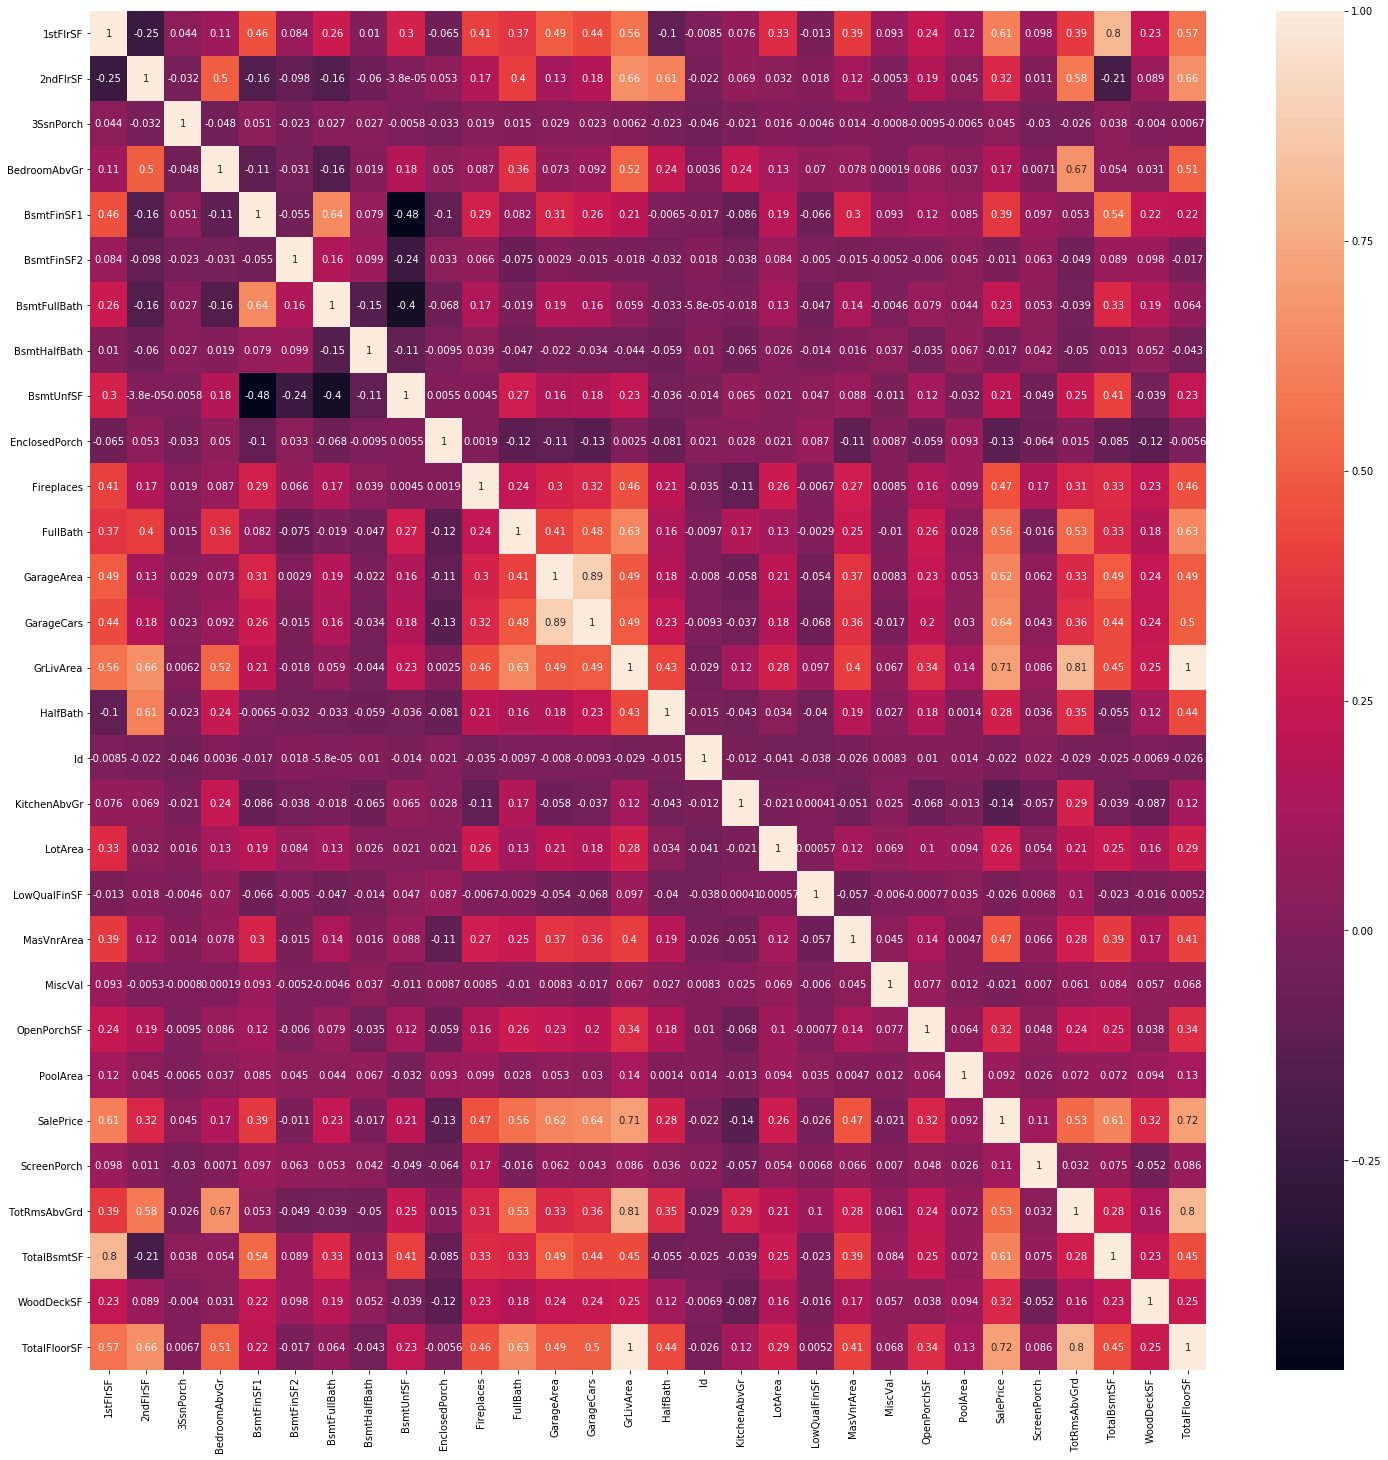

In [100]:
fig, ax = plt.subplots(figsize = (25,25))
sns.heatmap(df.corr(), annot=True, ax=ax)

3SsPorch, BedroomAbvGr, BsmtFinType2, BsmtFullBath, BasmtHalfBath, BsmtUnfSF, EnclosedPorch, KitchenAbvGr, LowQualFinSF, MiscVal, PoolArea, ScreenPorch have weak correlations with Sale Price so we will remove them. 

In [101]:
df.drop(['3SsnPorch'], axis=1, inplace=True)
df.drop(['BedroomAbvGr'], axis=1, inplace=True)
df.drop(['BsmtFullBath'], axis=1, inplace=True)
df.drop(['BsmtHalfBath'], axis=1, inplace=True)
df.drop(['BsmtUnfSF'], axis=1, inplace=True)
df.drop(['EnclosedPorch'], axis=1, inplace=True)
df.drop(['KitchenAbvGr'], axis=1, inplace=True)
df.drop(['LowQualFinSF'], axis=1, inplace=True)
df.drop(['MiscVal'], axis=1, inplace=True)
df.drop(['PoolArea'], axis=1, inplace=True)
df.drop(['ScreenPorch'], axis=1, inplace=True)
df.drop(['Id'], axis=1, inplace=True)
df.drop(['GrLivArea'], axis=1, inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 0 to 1458
Data columns (total 64 columns):
1stFlrSF         2915 non-null int64
2ndFlrSF         2915 non-null int64
BldgType         2915 non-null object
BsmtCond         2915 non-null object
BsmtExposure     2915 non-null object
BsmtFinSF1       2915 non-null float64
BsmtFinSF2       2915 non-null float64
BsmtFinType1     2915 non-null object
BsmtFinType2     2915 non-null object
BsmtQual         2915 non-null object
CentralAir       2915 non-null object
Condition1       2915 non-null object
Condition2       2915 non-null object
Electrical       2915 non-null object
ExterCond        2915 non-null object
ExterQual        2915 non-null object
Exterior1st      2915 non-null object
Exterior2nd      2915 non-null object
Fence            2915 non-null object
Fireplaces       2915 non-null int64
Foundation       2915 non-null object
FullBath         2915 non-null int64
Functional       2915 non-null object
GarageArea       2915

In [103]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [104]:
df_dummies.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,Fireplaces,FullBath,GarageArea,GarageCars,HalfBath,LotArea,MasVnrArea,OpenPorchSF,SalePrice,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,TotalFloorSF,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1896.0,GarageYrBlt_1900.0,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1917.0,GarageYrBlt_1918.0,GarageYrBlt_1919.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1943.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1971.0,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2

# Splitting the Data to Train and Test 

In [105]:
df_train = df_dummies.loc[df['SalePrice'].notnull()]
df_train.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,Fireplaces,FullBath,GarageArea,GarageCars,HalfBath,LotArea,MasVnrArea,OpenPorchSF,SalePrice,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,TotalFloorSF,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1896.0,GarageYrBlt_1900.0,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1917.0,GarageYrBlt_1918.0,GarageYrBlt_1919.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1943.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1971.0,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2

In [106]:
df_test = df_dummies.loc[df['SalePrice'].isnull()]
df_test.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,Fireplaces,FullBath,GarageArea,GarageCars,HalfBath,LotArea,MasVnrArea,OpenPorchSF,SalePrice,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,TotalFloorSF,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1896.0,GarageYrBlt_1900.0,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1917.0,GarageYrBlt_1918.0,GarageYrBlt_1919.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1943.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1971.0,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2

In [107]:
df_train.shape, df_test.shape

((1459, 553), (1456, 553))

# Setting Up Prediction

In [108]:
#Setting up variables 
X = df_train.drop(['SalePrice'], axis = 1)
y = df_train['SalePrice']
xtest = df_test.drop(['SalePrice'], axis = 1)
ytest = df_test['SalePrice']

In [109]:
x_test, x_train, y_test, y_train =train_test_split(X, y, test_size=.8, random_state=41)

In [116]:
x_test.shape, x_train.shape, y_test.shape, y_train.shape

((291, 552), (1168, 552), (291,), (1168,))

In [110]:
from sklearn.ensemble import GradientBoostingRegressor
gbc= GradientBoostingRegressor()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
model = gbc.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.8865309814229059


In [114]:
predictions = model.predict(x_test)

In [115]:
mean_squared_error(y_test, predictions)

830371758.2926472